# FYI directions, delete later

CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering

In the final assignment for this course, you will be using one of three different analysis methods:

* Option A: Use clustering on an unlabeled dataset to provide insight or features
* Option B: Use transaction data for mining associations rules
* Option C: Use collaborative filtering to build a custom recommendation system

Your choice of dataset will largely determine the task that you are trying to achieve. Though the dataset does not need to change from your previous tasks. For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed. Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.

Dataset Selection and Toolkits

As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.

* One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/
datasets/movielens/
* Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/

Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline). This report is worth 20% of the final grade.

# Lab 3: Zillow Dataset CRISP-DM Capstone: Association Rule Mining, Clustering, or Collaborative Filtering
MSDS 7331 Data Mining - Section 403 - Lab 3

Team: Ivelin Angelov, Yao Yao, Kaitlin Kirasich, Albert Asuncion

<a id="top"></a>
## Contents
* <a href="#Imports">Imports of libraries and data files</a>
* <a href="#Business">Business Understanding</a>
* <a href="#Description">Dataset Description</a>
    - <a href="#Description_1">Describtion of meaning and type of data attributes before the cleaning process</a>
    - <a href="#Description_2">Verification and description of data quality</a>
    - <a href="#Description_3">Cleaning process</a>
    - <a href="#Description_4">Final verification of data quality</a>
    - <a href="#Description_5">Describtion of meaning and type of final data attributes after the cleaning process</a>
    - <a href="#Description_6">Table of Binary Variables</a>
    - <a href="#save_state">Save cleaned dataset</a>
* <a href="#restore_state">Load cleaned dataset [Checkpoint]</a>
* <a href="#Attribute">Attribute Visualizion</a>
    - <a href="#Viz1">Count of Bedrooms</a>
    - <a href="#Viz2">Average Tax Per Square Feet</a>
    - <a href="#Viz3">Continuous Variable Correlation Heatmap</a>
    - <a href="#Viz4">Longitude and Latitude Data Points</a>
    - <a href="#Viz5">Number of Stories vs Year Built</a>
* <a href="#Train">Train and Adjust Parameters</a>
    - <a href="#train_kmeans">KMeans Clustering</a>
    - <a href="#train_agglomerative">Agglomerative Clustering</a>
    - <a href="#train_spectral">Spectral Clustering</a>

* <a href="#Evaluate">Evaluate and Compare</a>
* <a href="#Visualize">Visualize Results</a>
* <a href="#Ramifications">Summarize the Ramifications</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
* <a href="#References">References</a>
________________________________________________________________________________________________________
<a href="#top">⏫ Back to Top</a>

<a id="Imports"></a>
# Imports of libraries and utility functions

<a href="#top">⏫ Back to Top</a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from IPython.display import display, HTML

# import warnings
# warnings.filterwarnings('ignore')

variables_description = [
['airconditioningtypeid', 'nominal', 'TBD', 'Type of cooling system present in the home (if any)']
,['architecturalstyletypeid', 'nominal', 'TBD', 'Architectural style of the home (i.e. ranch, colonial, split-level, etc…)']
,['assessmentyear', 'interval', 'TBD', 'The year of the property tax assessment']
,['basementsqft', 'ratio', 'TBD', 'Finished living area below or partially below ground level']
,['bathroomcnt', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathrooms']
,['bedroomcnt', 'ordinal', 'TBD', 'Number of bedrooms in home']
,['buildingclasstypeid', 'nominal', 'TBD', 'The building framing type (steel frame, wood frame, concrete/brick)']
,['buildingqualitytypeid', 'ordinal', 'TBD', 'Overall assessment of condition of the building from best (lowest) to worst (highest)']
,['calculatedbathnbr', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathroom']
,['calculatedfinishedsquarefeet', 'ratio', 'TBD', 'Calculated total finished living area of the home']
,['censustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['decktypeid', 'nominal', 'TBD', 'Type of deck (if any) present on parcel']
,['finishedfloor1squarefeet', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet12', 'ratio', 'TBD', 'Finished living area']
,['finishedsquarefeet13', 'ratio', 'TBD', 'Perimeter living area']
,['finishedsquarefeet15', 'ratio', 'TBD', 'Total area']
,['finishedsquarefeet50', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet6', 'ratio', 'TBD', 'Base unfinished and finished area']
,['fips', 'nominal', 'TBD', 'Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details']
,['fireplacecnt', 'ordinal', 'TBD', 'Number of fireplaces in a home (if any)']
,['fireplaceflag', 'ordinal', 'TBD', 'Is a fireplace present in this home']
,['fullbathcnt', 'ordinal', 'TBD', 'Number of full bathrooms (sink, shower + bathtub, and toilet) present in home']
,['garagecarcnt', 'ordinal', 'TBD', 'Total number of garages on the lot including an attached garage']
,['garagetotalsqft', 'ratio', 'TBD', 'Total number of square feet of all garages on lot including an attached garage']
,['hashottuborspa', 'ordinal', 'TBD', 'Does the home have a hot tub or spa']
,['heatingorsystemtypeid', 'nominal', 'TBD', 'Type of home heating system']
,['landtaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the land area of the parcel']
,['latitude', 'interval', 'TBD', 'Latitude of the middle of the parcel multiplied by 10e6']
,['logerror', 'interval', 'TBD', 'Error or the Zillow model response variable']
,['longitude', 'interval', 'TBD', 'Longitude of the middle of the parcel multiplied by 10e6']
,['lotsizesquarefeet', 'ratio', 'TBD', 'Area of the lot in square feet']
,['numberofstories', 'ordinal', 'TBD', 'Number of stories or levels the home has']
,['parcelid', 'nominal', 'TBD', 'Unique identifier for parcels (lots)']
,['poolcnt', 'ordinal', 'TBD', 'Number of pools on the lot (if any)']
,['poolsizesum', 'ratio', 'TBD', 'Total square footage of all pools on property']
,['pooltypeid10', 'nominal', 'TBD', 'Spa or Hot Tub']
,['pooltypeid2', 'nominal', 'TBD', 'Pool with Spa/Hot Tub']
,['pooltypeid7', 'nominal', 'TBD', 'Pool without hot tub']
,['propertycountylandusecode', 'nominal', 'TBD', 'County land use code i.e. it\'s zoning at the county level']
,['propertylandusetypeid', 'nominal', 'TBD', 'Type of land use the property is zoned for']
,['propertyzoningdesc', 'nominal', 'TBD', 'Description of the allowed land uses (zoning) for that property']
,['rawcensustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['regionidcity', 'nominal', 'TBD', 'City in which the property is located (if any)']
,['regionidcounty', 'nominal', 'TBD', 'County in which the property is located']
,['regionidneighborhood', 'nominal', 'TBD', 'Neighborhood in which the property is located']
,['regionidzip', 'nominal', 'TBD', 'Zip code in which the property is located']
,['roomcnt', 'ordinal', 'TBD', 'Total number of rooms in the principal residence']
,['storytypeid', 'nominal', 'TBD', 'Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.']
,['structuretaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the built structure on the parcel']
,['taxamount', 'ratio', 'TBD', 'The total property tax assessed for that assessment year']
,['taxdelinquencyflag', 'nominal', 'TBD', 'Property taxes for this parcel are past due as of 2015']
,['taxdelinquencyyear', 'interval', 'TBD', 'Year']
,['taxvaluedollarcnt', 'ratio', 'TBD', 'The total tax assessed value of the parcel']
,['threequarterbathnbr', 'ordinal', 'TBD', 'Number of 3/4 bathrooms in house (shower + sink + toilet)']
,['transactiondate', 'nominal', 'TBD', 'Date of the transaction response variable']    
,['typeconstructiontypeid', 'nominal', 'TBD', 'What type of construction material was used to construct the home']
,['unitcnt', 'ordinal', 'TBD', 'Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)']
,['yardbuildingsqft17', 'interval', 'TBD', 'Patio in yard']
,['yardbuildingsqft26', 'interval', 'TBD', 'Storage shed/building in yard']
,['yearbuilt', 'interval', 'TBD', 'The Year the principal residence was built']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')

def output_variables_table(variables, dataset):
    variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Meaning</th></tr>']
    for vname, atts in variables.iterrows():
        if vname not in dataset.columns:
            continue
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = dataset[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d)' % (dataset[vname].min(), dataset[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

def fix_outliers(data, column):
    """
        An utility function used to find and fix outliers
    """
    mean = data[column].mean()
    std = data[column].std()
    max_value = mean + std * 5
    min_value = mean - std * 5
    
    if data[column].max() < max_value and data[column].min() > min_value:
        print('No outliers found')
        return
    
    print('Outliers found!')
    
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=[15, 7])
    
    f.subplots_adjust(hspace=.4)
    
    sns.boxplot(data[column].dropna(), ax=ax0, color="#34495e").set_title('Before')
    sns.distplot(data[column].dropna(), ax=ax2, color="#34495e").set_title('Before')

    data.loc[data[column] > max_value, column] = max_value
    data.loc[data[column] < min_value, column] = min_value
    
    sns.boxplot(data[column].dropna(), ax=ax1, color="#34495e").set_title('After')
    sns.distplot(data[column].dropna(), ax=ax3, color="#34495e").set_title('After')


## Load the dataset file

You can skip this and go directly to checkpoint to load a clean dataset

<a href="#top">⏫ Back to Top</a>

In [2]:
datafilename = '../../input/properties_2016.csv'

if not os.path.exists(datafilename):
    raise Exception('Download properties_2016.csv.zip file from https://www.kaggle.com/c/zillow-prize-1/data and extract it into the input foulder')

dataset = pd.read_csv(datafilename, low_memory=False)
variables = variables.loc[dataset.columns]
'The dataset has %d rows and %d columns' % dataset.shape

'The dataset has 2985217 rows and 58 columns'

<a id="Business"></a>
# Business Understanding
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?
</i>

<a href="#top">⏫ Back to Top</a>

This is a dataset from a Kaggle competion: "Zillow Prize: Zillow’s Home Value Prediction (Zestimate)". It has a submittion deadline in about 3 months and $1,200,000 Prize Money.

Zillow is one of the leading real estate and rental marketplace platforms. They have a model which estimates a property price based on the property description and this call this estimation Zestimate. As with every real world model, Zestimate has some error in the prediction. In this competition, Zillow is asking us to predict the log-error between their Zestimate and the actual sale price, given all the features of a home. The log error is defined as:

$logerror=log(Zestimate)−log(SalePrice)$

where logerror < 0 will represent Zestimate been lower than the actual sell price and logerror > 0 represent Zestimate has estimated the property to cost more than the price it got sold.

We are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016. The dataset contains:
- ID for the listing 
- 57 variables describing the property as square foots
number of bedrooms
- two result variables: logerror and transaction date

Train and test datasets:
- train data with <b>90275 rows</b> (containing logerror and transaction date) has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
- test data with <b>2895067 rows</b> in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.

The competition comes down to: <b>can we build a model that estimates better than Zillow's?</b>

To measure the effectiveness of a good prediction algorithm we will first use cross valiadated splitting of the train dataset to train/valid/test and estimate our test prediction error. A final prediction error will be estimated by kaggle when we submit our predictions.

This notebook will be used by us as documentation for the dataset. Here is what we do:
- Clean the dataset. We are are looking at every variable individually in order to remove high outliers and deal with missing values
- Create a table with all variable names, attribute types, range and description. We will use this table as a refference
- Get some statistical summary of the dataset
- Visualize Attributes in order to get familiar with ranges, distibutions
- Visualize relationships between attributes
- Identify and explain interesting relationships between features and the class you are trying to predict
- Add New Features
- And more..

<a id="Description"></a>
# Dataset Description
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Description_1"></a>
## Meaning and type of data for each attribute in the data file before data cleaning
<br/>
<a href="#top">⏫ Back to Top</a>

In [3]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[nan, 1.0, 13.0, 5.0, 11.0, 9.0, 12.0, 3.0]",Type of cooling system present in the home (if any)
architecturalstyletypeid,nominal,"[nan, 7.0, 21.0, 8.0, 2.0, 3.0, 5.0, 10.0, 27.0]","Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
basementsqft,ratio,"(20, 8516)",Finished living area below or partially below ground level
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (38 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0.0, 4.0, 5.0, 2.0, 3.0, ... (22 More)]",Number of bedrooms in home
buildingclasstypeid,nominal,"[nan, 3.0, 4.0, 5.0, 2.0, 1.0]","The building framing type (steel frame, wood frame, concrete/brick)"
buildingqualitytypeid,ordinal,"[nan, 7.0, 4.0, 10.0, 1.0, ... (13 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[nan, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(1, 952576)",Calculated total finished living area of the home


<a id="Description_2"></a>
## Verification and description of data quality

<a href="#top">

⏫ Back to Top</a>

### Examining Distribution of Missing Values
From the observations, most of the rows have about 30 missing values. For the observations that have 57 missing values, it means that most of the features are missing and we choose to remove those. We will add in values to those missing where appropriate, below.

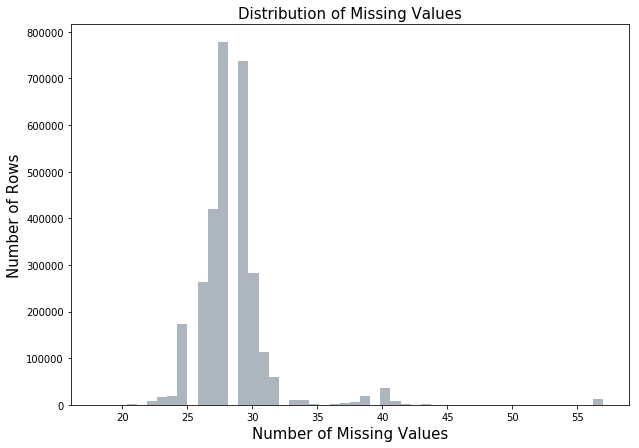

In [4]:
plt.rcParams['figure.figsize'] = [10, 7]

number_missing_per_row = dataset.isnull().sum(axis=1)
sns.distplot(number_missing_per_row, color="#34495e", kde=False);
plt.title('Distribution of Missing Values', fontsize=15)
plt.xlabel('Number of Missing Values', fontsize=15)
plt.ylabel('Number of Rows', fontsize=15);

### All observations have a value for parcelid

In [5]:
dataset['parcelid'].isnull().sum()

0

### 0.1 percent of the data has only parcelid present and all other variables missing
We choose to remove those observations because they don't present any value

In [6]:
print(round(len(number_missing_per_row[number_missing_per_row >= 57]) / len(dataset) * 100, 2),
      'percent of the data has no data features outside of parcelid and will be removed')
dataset = dataset[number_missing_per_row < 57]
print('The dataset now has %d rows' % len(dataset))

0.38 percent of the data has no data features outside of parcelid and will be removed
The dataset now has 2973780 rows


### Table of Missing Values

Of the available variables, here is a table that describes the number of missing values as well as the percent missing.

In [7]:
missing_values = dataset.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values['Percent Missing'] = missing_values['Number Missing Values'] / len(dataset) * 100
missing_values['Percent Missing'] = missing_values['Percent Missing'].replace(np.inf, 0)
missing_values.set_index('Variable Name')

,Number Missing Values,Percent Missing
Variable Name,,
parcelid,0,0.000000
airconditioningtypeid,2162261,72.710860
architecturalstyletypeid,2967719,99.796185
basementsqft,2972152,99.945255
bathroomcnt,25,0.000841
bedroomcnt,13,0.000437
buildingclasstypeid,2961151,99.575322
buildingqualitytypeid,1035292,34.814008
calculatedbathnbr,117475,3.950359


<a id="Description_3"></a>
## Cleaning process

For variables that are nominal, ratio, and interval where appropriate, we wrote a function that replaces outliers 5 standard deviations from the mean and assigning them as 5 standard deviations above or below the mean, respectively.

<a href="#top">⏫ Back to Top</a>

### Variable: airconditioningtypeid - Type of cooling system present in the home (if any)
Has datatype: nominal and 72.710860 percent of values missing 

For this variable, missing values indicate the absence of a cooling system.  We replace all missing values with 0 to represent no cooling system. We changed the column datatype to integer.

In [8]:
print('Before', dataset['airconditioningtypeid'].unique())
dataset['airconditioningtypeid'] = dataset['airconditioningtypeid'].fillna(0).astype(np.int32)
print('After', dataset['airconditioningtypeid'].unique())

Before [ nan   1.  13.   5.  11.   9.  12.   3.]
After [ 0  1 13  5 11  9 12  3]


### Variable: architecturalstyletypeid - Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
Has datatype: nominal and 99.796185 percent of values missing 

Architectural style describes the home design. As such, it is not something we can extrapolate a value for. With over 99% of values missing, we decided to eliminate this variable.

In [9]:
del dataset['architecturalstyletypeid']

### Variable: assessmentyear - year of the property tax assessment

Has datatype: interval and has 2 values missing

We replaced the missing values with the latest tax year which also happens to be the median tax year. We changed the column datatype to integer.

In [10]:
print('Before', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])
median_value = dataset['assessmentyear'].median()
dataset['assessmentyear'] = dataset['assessmentyear'].fillna(median_value).astype(np.int32)
print('After', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])

Before [2015.0, 2014.0, 2003.0, 2012.0, 2001.0, 2011.0, 2013.0, 2016.0, '...']
After [2015, 2014, 2003, 2012, 2001, 2011, 2013, 2016, '...']


### Variable: basementsqft - Finished living area below or partially below ground level
Has datatype: ratio and 99.945255 percent of values missing

Basements are not standard home features. Whenever a basement is not a feature of the home, the value for area was entered as a missing value. With over 99% of values missing, we decided to eliminate this variable.

In [11]:
del dataset['basementsqft'] 

### Variable: bathroomcnt - Number of bathrooms in home including fractional bathrooms
Has datatype: ordinal and 0.000841 percent of values missing

We decided it is potentially possible for the property to not have a bathroom so we decided to replace missing values with zeros since there are only very few. We changed the column datatype to a float.

In [12]:
print('Before', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bathroomcnt'] = dataset['bathroomcnt'].fillna(0).astype(np.float32)
print('After', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: bedroomcnt - Number of bedrooms in home
Has datatype: ordinal and 0.000437 percent of values missing

We decided to replace missing values with zeros since there are only very few to represent a studio apartment. We changed the column datatype to integer.

In [13]:
print('Before', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bedroomcnt'] = dataset['bedroomcnt'].fillna(0).astype(np.int32)
print('After', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 4.0, 5.0, 2.0, 3.0, 1.0, 6.0, 7.0, '...']
After [0, 4, 5, 2, 3, 1, 6, 7, '...']


### Variable: buildingclasstypeid - The building framing type (steel frame, wood frame, concrete/brick)
Has datatype: nominal and 99.576949 percent of values missing

With this much missing values and the difficulty of assigning a building framing type, we decided to remove this variable.

In [14]:
del dataset['buildingclasstypeid']

### Variable: buildingqualitytypeid - Overall assessment of condition of the building from best (lowest) to worst (highest)
Has datatype: ordinal and 34.81 percent of values missing

We chose to replace the missing values with the median of the condition assessment instead of giving the missing values the best or worst value. We changed the column datatype to integer.

In [15]:
print('Before', dataset['buildingqualitytypeid'].unique())
medianQuality = dataset['buildingqualitytypeid'].median()
dataset['buildingqualitytypeid'] = dataset['buildingqualitytypeid'].fillna(medianQuality).astype(np.int32)
print('After', dataset['buildingqualitytypeid'].unique())

Before [ nan   7.   4.  10.   1.  12.   8.   3.   6.   9.   5.  11.   2.]
After [ 7  4 10  1 12  8  3  6  9  5 11  2]


### Variable: calculatedbathnbr - Number of bathrooms in home including fractional bathroom
Has datatype: ordinal and 3.95 percent of values missing

With a low number of missing values, we decided to assign 0 to all missing values since we decided above it is possible that a property could have 0 bathrooms. We changed the column datatype to a float.

In [16]:
print('Before', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])
dataset['calculatedbathnbr'] = dataset['calculatedbathnbr'].fillna(0).astype(np.float32)
print('After', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: calculatedfinishedsquarefeet - Calculated total finished living area of the home
Has datatype: ratio and 1.48 percent of values missing

These missing values appear to be consistent with 0 or missing values for variables associated with a building or structure on the property such as bathroomcnt, bedroomcnt, or architecturalstyletypeid. We can assume that no structures exist on these properties and we decided to impute zeros to these. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 10926.064470192776, 5068.0, 1776.0, 2400.0, 3611.0, 3754.0, 2470.0, '...']
After [0, 10926, 5068, 1776, 2400, 3611, 3754, 2470, '...']


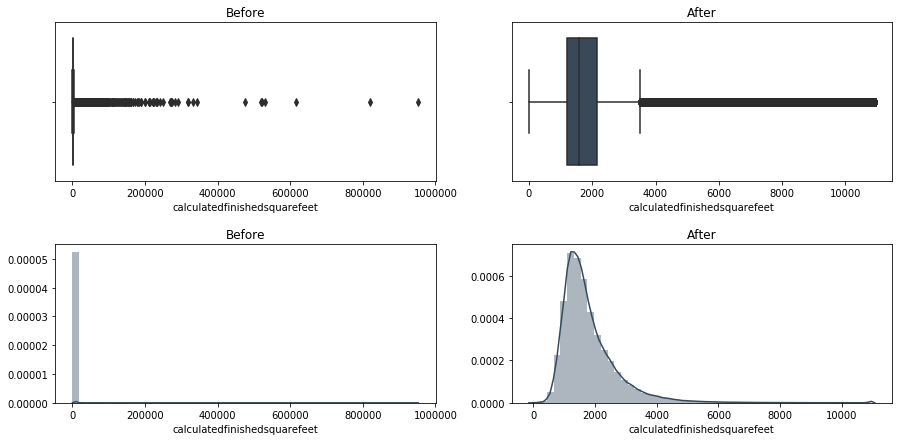

In [17]:
fix_outliers(dataset, 'calculatedfinishedsquarefeet')

print('Before', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])
dataset['calculatedfinishedsquarefeet'] = dataset['calculatedfinishedsquarefeet'].fillna(0).astype(np.int32)
print('After', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])

### Variable: censustractandblock - census tract and census block ID

Has datatype: nominal and 2.14 percent of values missing

With such a small amount of missing values, we decided to replace them with the median.  A better approach in the future could be taking into account zip code and then median for the missing values.  We changed the column datatype to a float.

In [18]:
print('Before', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])
median_value = dataset['censustractandblock'].median()
dataset['censustractandblock'] = dataset['censustractandblock'].fillna(median_value)
dataset['censustractandblock'] = dataset['censustractandblock'].astype(np.float32)
print('After', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])

Before [nan, 61110010011023.0, 61110009032019.0, 61110010024015.0, 61110010023002.0, '...']
After [60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, '...']


### Variable: decktypeid - Type of deck (if any) present on parcel
Has datatype: nominal and 99.427311 percent of values missing

Missing values is most likely an indication of an absence of this feature in the property. With 99% missing values, we will remove this column.

In [19]:
del dataset['decktypeid']

### Variable: finishedfloor1squarefeet - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

Having this much missing values and the availability of an alternate variable - calculatedfinishedsquarefeet - with very few missing values, we decided to eliminate this variable.

In [20]:
del dataset['finishedfloor1squarefeet']

### Variable: finishedsquarefeet12 - Finished living area
Has datatype: ratio and 8.89 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Missing values are therefore zeros. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [   nan  4000.  3633. ...,   317.   268.   161.]
After [   0 4000 3633 ...,  317  268  161]


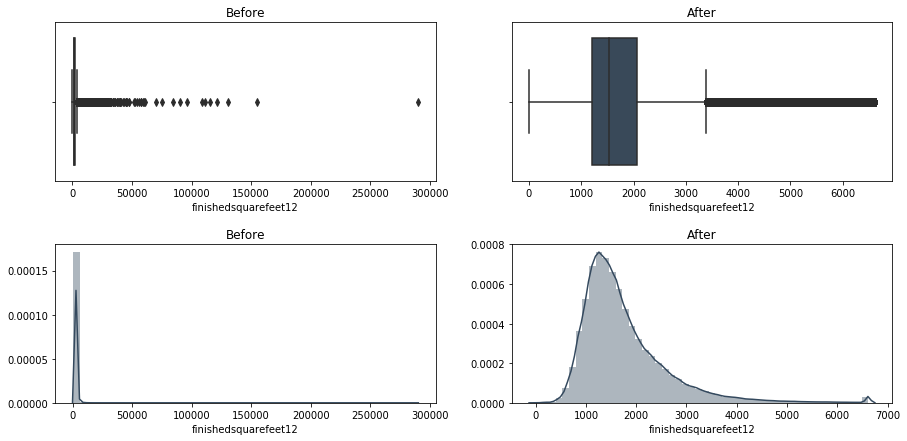

In [21]:
fix_outliers(dataset, 'finishedsquarefeet12')

print('Before', dataset['finishedsquarefeet12'].unique())
dataset['finishedsquarefeet12'] = dataset['finishedsquarefeet12'].fillna(0).astype(np.int32)
print('After', dataset['finishedsquarefeet12'].unique())

### Variable: finishedsquarefeet13 - Finished living area
Has datatype: ratio and 99.743000 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 99% missing values we will remove this from the dataset.

In [22]:
del dataset['finishedsquarefeet13']

### Variable: finishedsquarefeet15 - Total area
Has datatype: ratio and 93.58 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will remove this from the dataset.

In [23]:
del dataset['finishedsquarefeet15']

### Variable: finishedsquarefeet50 - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will replace the missing values with 0. We changed the column datatype to float.

In [24]:
dataset['finishedsquarefeet50'] = dataset['finishedsquarefeet50'].fillna(0).astype(np.float32)

### Variable: finishedsquarefeet6 - Base unfinished and finished area
Has datatype: ratio and 99.26 percent of values missing

With 99% missing values, we decided to delete this variable.

In [25]:
del dataset['finishedsquarefeet6']

### Variable: fips - Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
Has datatype: nominal with values [6037.0, 6059.0, 6111.0] and no missing values

We changed the column datatype to integer.

In [26]:
dataset['fips'] = dataset['fips'].astype(np.int32)

### Variable: fireplacecnt - Number of fireplaces in a home (if any)
Has datatype: ordinal and 89.486882 percent of values missing 

In this dataset, missing value represents 0 fireplaces. We replaced all missing values with zero and change the column datatype to integer. We changed the column datatype to integer.

In [27]:
print('Before', dataset['fireplacecnt'].unique())
dataset['fireplacecnt'] = dataset['fireplacecnt'].fillna(0).astype(np.int32)
print('After', dataset['fireplacecnt'].unique())

Before [ nan   3.   1.   2.   4.   9.   5.   7.   6.   8.]
After [0 3 1 2 4 9 5 7 6 8]


### Variable: fireplaceflag - does the home have a fireplace

Has datatype: ordinal and 99.82 percent of values missing

With 99% missing values, we decided to delete the variable.

In [28]:
del dataset['fireplaceflag']

### Variable: fullbathcnt - Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
Has datatype: ordinal and 3.95 percent of values missing 

We first replaced its missing values with the values of bathroomcnt which is a similar measure. After that, we have 25 observations missing and we replace them with 0. We changed the column datatype to a float.

In [29]:
print('Before', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])
missing_fullbathcnt = dataset['fullbathcnt'].isnull()
dataset.loc[missing_fullbathcnt, 'fullbathcnt'] = dataset['bathroomcnt'][missing_fullbathcnt].fillna(0)
dataset['fullbathcnt'] = dataset['fullbathcnt'].astype(np.float32)
print('After', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']


### Variable: garagecarcnt - Total number of garages on the lot including an attached garage

Has datatype: ordinal and 70.298173 percent of values missing 

We assume that missing values will represent no garage and replace all missing values with zero. We changed the column datatype to integer.

In [30]:
dataset['garagecarcnt'] = dataset['garagecarcnt'].fillna(0).astype(np.int32)
print(dataset['garagecarcnt'].unique())

[ 0  2  4  1  3  5  7  6  8  9 12 11 10 13 14 15 25 21 18 17 24 19 16 20]


### Variable: garagetotalsqft - Total number of garages on the lot including an attached garage

Has datatype: ratio and 70.298173 percent of values missing 

We first replaced missing values where garagecarcnt is 0 with 0 garagetotalsqft. We changed the column datatype to a float.
We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


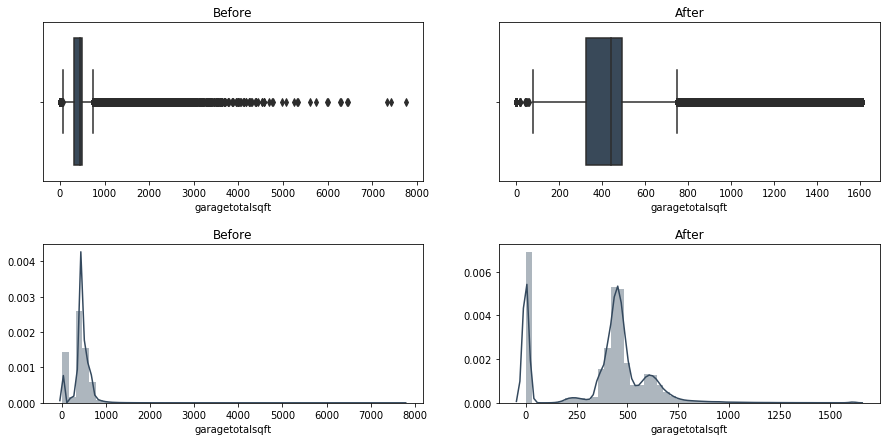

In [31]:
fix_outliers(dataset, 'garagetotalsqft')

dataset.loc[dataset['garagecarcnt'] == 0, 'garagetotalsqft'] = 0
dataset['garagecarcnt'] = dataset['garagecarcnt'].astype(np.float32)
assert dataset['garagetotalsqft'].isnull().sum() == 0

### Variable: hashottuborspa - Does the home have a hot tub or spa

Has datatype: ordinal and 97.679250 percent of values missing 

In this dataset missing values represent doesn't have a hot tub or spa. we replaced all missing values with 0 and all True values with 1. We changed the column datatype to integer.

In [32]:
print('Before', dataset['hashottuborspa'].unique())
dataset['hashottuborspa'] = dataset['hashottuborspa'].fillna(0).replace('True', 1).astype(np.int32)
print('After', dataset['hashottuborspa'].unique())

Before [nan True]
After [0 1]


### Variable: heatingorsystemtypeid - Type of home heating system

Has datatype: nominal and 39.255728 percent of values missing 

We replaced all missing values with 0 which will represent a missing heating system type id. We changed the column datatype to integer.

In [33]:
print('Before', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])
dataset['heatingorsystemtypeid'] = dataset['heatingorsystemtypeid'].fillna(0).astype(np.int32)
print('After', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 7.0, 20.0, 6.0, 13.0, 18.0, 24.0, '...']
After [0, 2, 7, 20, 6, 13, 18, 24, '...']


### Variable: landtaxvaluedollarcnt - the assessed value of the land

Has datatype: ratio and 1.89 percent of values missing

We replaced all missing values with the median assessed land values. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


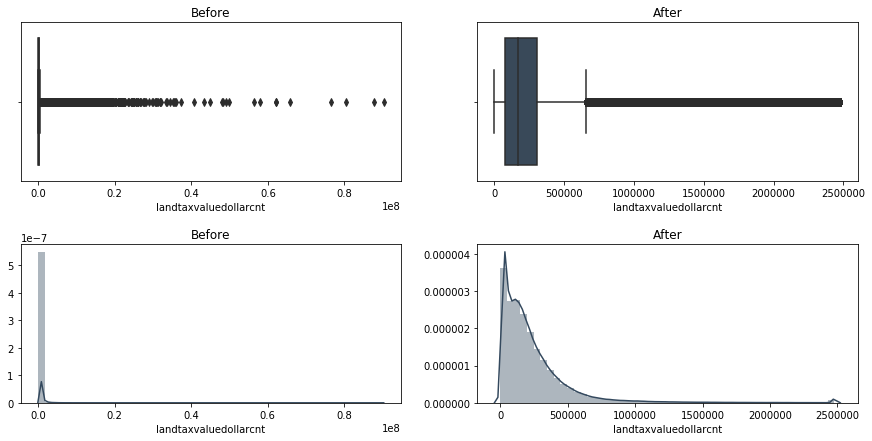

In [34]:
fix_outliers(dataset, 'landtaxvaluedollarcnt')
median_value = dataset['landtaxvaluedollarcnt'].median()
dataset['landtaxvaluedollarcnt'] = dataset['landtaxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variables: latitude and longitude

Has datatype: interval and no missing values. We changed the column datatype to float.

In [35]:
dataset[['latitude', 'longitude']] = dataset[['latitude', 'longitude']].astype(np.float32)

### Variable: lotsizesquarefeet - Area of the lot in square feet

Has datatype: ratio and 8.9 percent of values missing 

We replace all missing values with 0 which will represent no lot.
We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


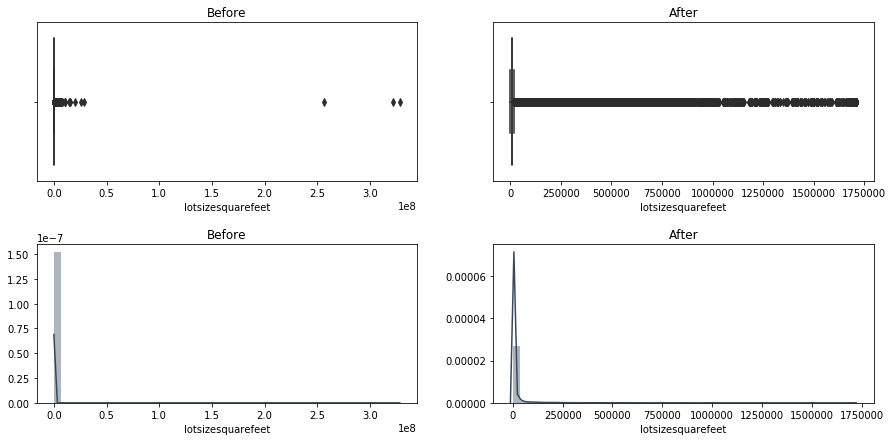

In [36]:
fix_outliers(dataset, 'lotsizesquarefeet')
dataset['lotsizesquarefeet'] = dataset['lotsizesquarefeet'].fillna(0).astype(np.float32)

### Variable: numberofstories - number of stories or levels the home has

Has datatype: ordinal and 77.06 percent of values missing

We replace all missing values with 1 after removing all outliers to represent a single story home. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 1.0, 4.0, 2.0, 3.0, 4.096842535392357, '...']
After [1, 4, 2, 3, '...']


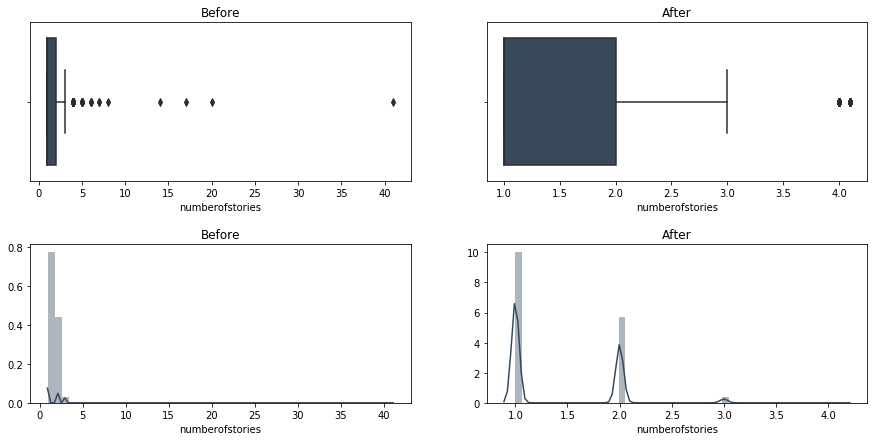

In [37]:
fix_outliers(dataset, 'numberofstories')

print('Before', dataset['numberofstories'].unique()[:8].tolist() + ['...'])
dataset['numberofstories'] = dataset['numberofstories'].fillna(1).astype(np.int32)
print('After', dataset['numberofstories'].unique()[:8].tolist() + ['...'])

### Variable: parcelid - Unique identifier for parcels (lots)
Has datatype: nominal and no values missing. We changed the column datatype to integer.

In [38]:
dataset['parcelid'] = dataset['parcelid'].astype(np.int32)

### Variable: poolcnt - Number of pools on the lot (if any)

Has datatype: ordinal and 82.6 percent of values missing 

We replaced all missing values with 0 which will represent no pools. We changed the column datatype to integer.

In [39]:
print('Before', dataset['poolcnt'].unique())
dataset['poolcnt'] = dataset['poolcnt'].fillna(0).astype(np.int32)
print('After', dataset['poolcnt'].unique())

Before [ nan   1.]
After [0 1]


### Variable: poolsizesum - Total square footage of all pools on property

Has datatype: ratio and 99 percent of values missing 

We replaced all missing values with 0 if number of pools is 0 or with the average poolsizesum otherwise. We changed the column datatype to a float. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


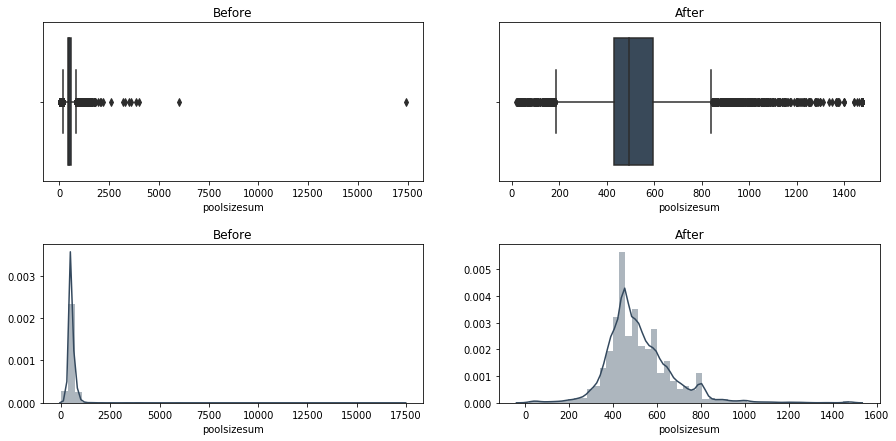

In [40]:
fix_outliers(dataset, 'poolsizesum')
dataset.loc[dataset['poolsizesum'].isnull(), 'poolsizesum'] = int(dataset['poolsizesum'].mean())
dataset.loc[dataset['poolcnt'] == 0, 'poolsizesum'] = 0
dataset['poolcnt'] = dataset['poolcnt'].astype(np.float32)

### Variable: pooltypeid10 - Spa or Hot Tub

Has datatype: nominal and 98.8 percent of values missing 

We replaced all missing values with 0 which will represent no Spa or Hot Tub. We changed the column datatype to integer.

In [41]:
print('Before', dataset['pooltypeid10'].unique())
dataset['pooltypeid10'] = dataset['pooltypeid10'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid10'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid2 - Pool with Spa/Hot Tub

Has datatype: nominal and 98.9 percent of values missing 

We replaced all missing values with 0 which will represent no Pool with Spa/Hot Tub. We changed the column datatype to integer.

In [42]:
print('Before', dataset['pooltypeid2'].unique())
dataset['pooltypeid2'] = dataset['pooltypeid2'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid2'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid7 - Pool without hot tub

Has datatype: nominal and 83.6 percent of values missing 

We replaced all missing values with 0 which will represent no pool without hot tub. We changed the column datatype to integer.

In [43]:
print('Before', dataset['pooltypeid7'].unique())
dataset['pooltypeid7'] = dataset['pooltypeid7'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid7'].unique())

Before [ nan   1.]
After [0 1]


### Variable: propertycountylandusecode - County land use code i.e. it's zoning at the county level

Has datatype: nominal and 0.02 percent of values missing 

We replaced all missing values with 0 which will represent no county land use code. We changed the column datatype to string.

In [44]:
print('Before', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])
dataset['propertycountylandusecode'] = dataset['propertycountylandusecode'].fillna(0).astype(np.str)
print('After', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])

Before ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']
After ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']


### Variable: propertylandusetypeid - Type of land use the property is zoned for

Has datatype: nominal and 0 percent of values missing.

We are just changing the datatype to integer

In [45]:
dataset['propertylandusetypeid'] = dataset['propertylandusetypeid'].astype(np.int32)

### Variable: propertyzoningdesc - Description of the allowed land uses (zoning) for that property

Has datatype: nominal and 33.4 percent of values missing 

We replaced all missing values with 0 which will represent no description of the allowed land uses.  We changed the column datatype to string.

In [46]:
print('Before', dataset['propertyzoningdesc'].unique())
dataset['propertyzoningdesc'] = dataset['propertyzoningdesc'].fillna(0).astype(np.str)
print('After', dataset['propertyzoningdesc'].unique())

Before [nan 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']
After ['0' 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']


### Variable: rawcensustractandblock - Census tract and block ID combined - also contains blockgroup assignment by extension

Has datatype: nominal and 0 percent of values missing

We are just changing the datatype to integer

In [47]:
print('Before', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])
dataset['rawcensustractandblock'] = dataset['rawcensustractandblock'].fillna(0).astype(np.int32)
print('After', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])

Before [60378002.041, 60378001.011002004, 60377030.012017004, 60371412.023001, 60371232.052003, '...']
After [60378002, 60378001, 60377030, 60371412, 60371232, '...']


### Variable: regionidcity - City in which the property is located (if any)

Has datatype: nominal and 1.72 percent of values missing

we will replace any missing values with 0 to represent no city ID. We are just changing the datatype to integer

In [48]:
print('Before', dataset['regionidcity'].unique()[:8].tolist() + ['...'])
dataset['regionidcity'] = dataset['regionidcity'].fillna(0).astype(np.int32)
print('After', dataset['regionidcity'].unique()[:8].tolist() + ['...'])

Before [37688.0, 51617.0, 12447.0, 396054.0, 47547.0, nan, 54311.0, 40227.0, '...']
After [37688, 51617, 12447, 396054, 47547, 0, 54311, 40227, '...']


### Variable: regionidcounty - County in which the property is located

Has datatype: nominal and 0 percent of values missing. We changed the column datatype to integer.

In [49]:
print('Before', dataset['regionidcounty'].unique())
dataset['regionidcounty'] = dataset['regionidcounty'].astype(np.int32)
print('After', dataset['regionidcounty'].unique())

Before [ 3101.  1286.  2061.]
After [3101 1286 2061]


### Variable: regionidneighborhood - Neighborhood in which the property is located

Has datatype: nominal and 61.1 percent of values missing 

We replaced all missing values with 0 which will represent no region ID neighborhood. We changed the column datatype to integer.

In [50]:
print('Before', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])
dataset['regionidneighborhood'] = dataset['regionidneighborhood'].fillna(0).astype(np.int32)
print('After', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])

Before [nan, 27080.0, 46795.0, 274049.0, 31817.0, 37739.0, 115729.0, 7877.0, '...']
After [0, 27080, 46795, 274049, 31817, 37739, 115729, 7877, '...']


### Variable: regionidzip - Zip code in which the property is located

Has datatype: nominal and 0.08 percent of values missing 

We replaced all missing values with 0 which will represent no zip code. We changed the column datatype to integer.

In [51]:
print('Before', dataset['regionidzip'].unique()[:8].tolist() + ['...'])
dataset['regionidzip'] = dataset['regionidzip'].fillna(0).astype(np.int32)
print('After', dataset['regionidzip'].unique()[:8].tolist() + ['...'])

Before [96337.0, 96095.0, 96424.0, 96450.0, 96446.0, 96049.0, 96434.0, 96436.0, '...']
After [96337, 96095, 96424, 96450, 96446, 96049, 96434, 96436, '...']


### Variable: roomcnt - Total number of rooms in the principal residence

Has datatype: nominal and 0.001 percent of values missing 

We replaced all missing values with 1 which will represent no Total number of rooms in the principal residence reported. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [  0.           8.           4.           5.           7.           6.          11.
   3.          10.           9.           2.          12.          15.67703238
  13.          15.          14.           1.                  nan]
After [ 0  8  4  5  7  6 11  3 10  9  2 12 15 13 14  1]


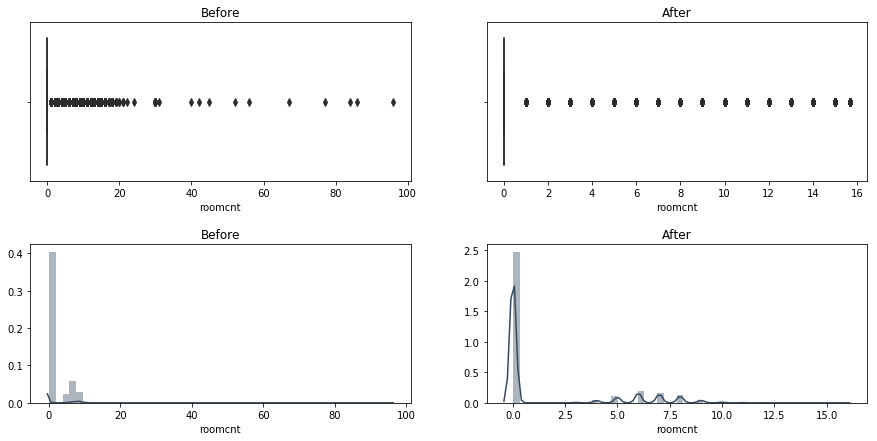

In [52]:
fix_outliers(dataset, 'roomcnt')

print('Before', dataset['roomcnt'].unique())
dataset['roomcnt'] = dataset['roomcnt'].fillna(1).astype(np.int32)
print('After', dataset['roomcnt'].unique())

### Variable: storytypeid - Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.

Has datatype: nominal and 99.9 percent of values missing 

With 99% missing values, we decided to remove this variable.


In [53]:
del dataset['storytypeid']

### Variable: structuretaxvaluedollarcnt - the assessed value of the building

Has datatype: ratio and 1.46 percent of values missing

We replaced all missing values with the median assessed building tax. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


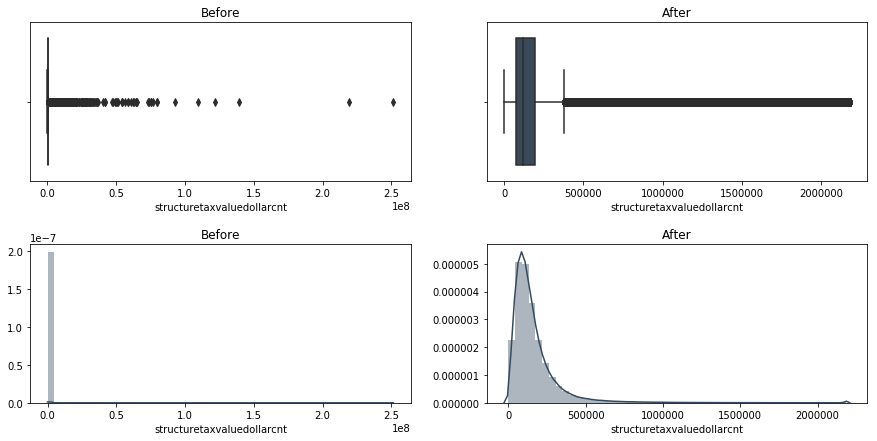

In [54]:
fix_outliers(dataset, 'structuretaxvaluedollarcnt')

medTax = np.nanmedian(dataset['structuretaxvaluedollarcnt'])

dataset['structuretaxvaluedollarcnt'] = dataset['structuretaxvaluedollarcnt'].fillna(medTax).astype(np.int32)

### Variable: taxamount - property tax for the assessment year

Has datatype: ratio and 0.66 percent of values missing

We replaced all missing values with the median property taxes for the assessment year. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


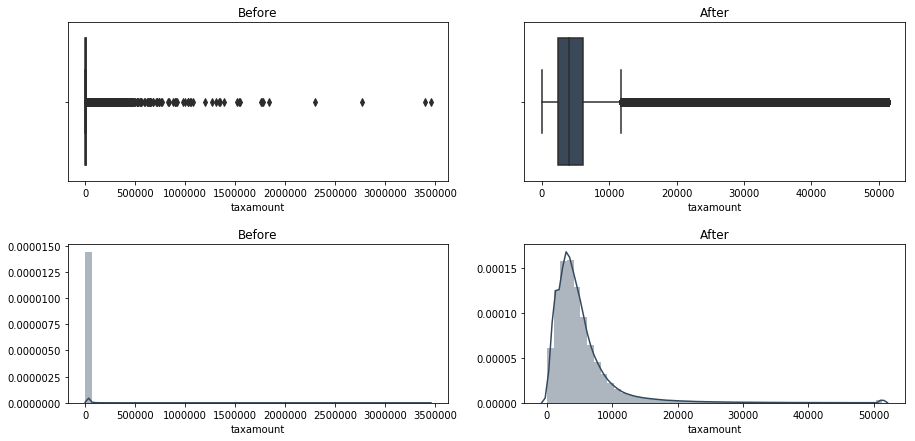

In [55]:
fix_outliers(dataset, 'taxamount')
median_value = dataset['taxamount'].median()
dataset['taxamount'] = dataset['taxamount'].fillna(median_value).astype(np.float32)

### Variable: taxdelinquencyflag - property taxes from 2015 that are past due

Has datatype: nominal and 98.10 percent of values missing

We replaced all missing values with 0 representing no past due property taxes and all Y values with 1 representing that there are past due property taxes. We changed the column datatype to integer.

In [56]:
print('Before', dataset['taxdelinquencyflag'].unique())
dataset['taxdelinquencyflag'] = dataset['taxdelinquencyflag'].fillna(0).replace('Y', 1).astype(np.int32)
print('After', dataset['taxdelinquencyflag'].unique())

Before [nan 'Y']
After [0 1]


### Variable: taxdelinquencyyear - years of delinquency

Has datatype: interval and 98.10 percent of values missing

We replaced all missing values with 0 representing no years of property tax delinquencies. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


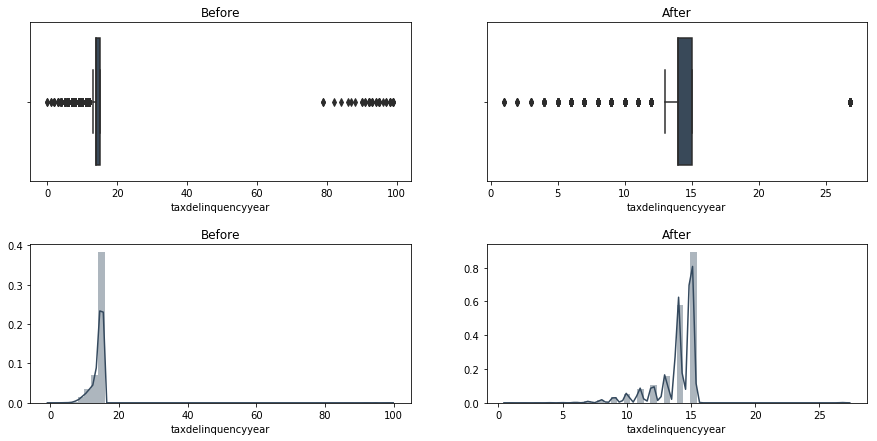

In [57]:
fix_outliers(dataset, 'taxdelinquencyyear')
dataset['taxdelinquencyyear'] = dataset['taxdelinquencyyear'].fillna(0).astype(np.int32)

### Variable: taxvaluedollarcnt - total tax 

Has datatype: ratio and 1.04 percent of values missing

We replaced all missing values with the median total tax amount. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


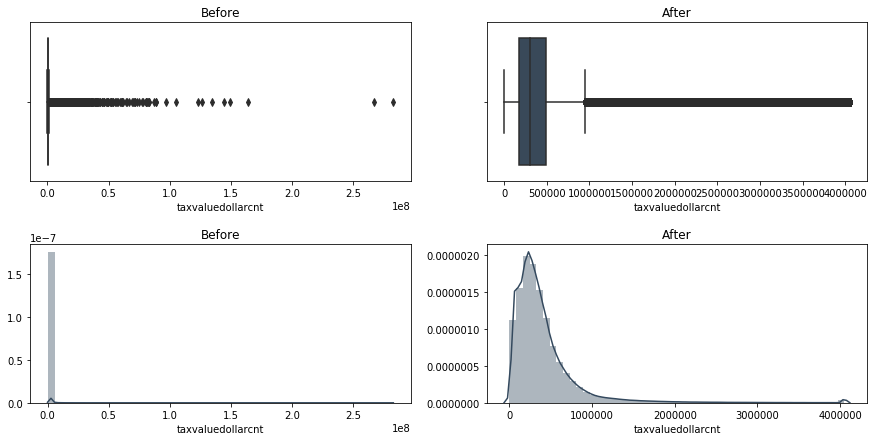

In [58]:
fix_outliers(dataset, 'taxvaluedollarcnt')
median_value = dataset['taxvaluedollarcnt'].median()
dataset['taxvaluedollarcnt'] = dataset['taxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variable: threequarterbathnbr - Number of 3/4 bathrooms in house (shower + sink + toilet)

Has datatype: ordinal and 89.5 percent of values missing 

We replaced all missing values with 0 which will represent no Number of 3/4 bathrooms in the property. We changed the column datatype to integer.

In [59]:
print('Before', dataset['threequarterbathnbr'].unique())
dataset['threequarterbathnbr'] = dataset['threequarterbathnbr'].fillna(0).astype(np.int32)
print('After', dataset['threequarterbathnbr'].unique())

Before [ nan   1.   2.   4.   3.   6.   5.   7.]
After [0 1 2 4 3 6 5 7]


### Variable: typeconstructiontypeid - What type of construction material was used to construct the home

Has datatype: nominal and 99.7 percent of values missing 

With 99% missing values, we decided to remove this variable.

In [60]:
del dataset['typeconstructiontypeid']

### Variable: unitcnt - number of units in the building

Has datatype: ordinal and 33.5 percent of values missing

We replaced all missing values with 1 to represent a single family home for any with no values.  We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 2.0, 1.0, 3.0, 5.0, 4.0, 9.0, 13.420650857467523, '...']
After [ 1  2  3  5  4  9 13 12  6  7  8 10 11]


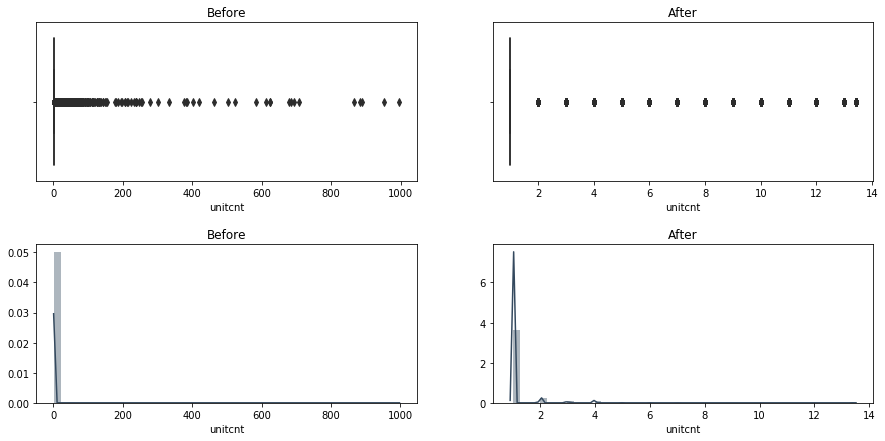

In [61]:
fix_outliers(dataset, 'unitcnt')

print('Before', dataset['unitcnt'].unique()[:8].tolist() + ['...'])
dataset['unitcnt'] = dataset['unitcnt'].fillna(1).astype(np.int32)
print('After', dataset['unitcnt'].unique())

### Variable: yardbuildingsqft17 - sq feet of patio in yard

Has datatype: interval and 97.29 percent of values missing

We replaced all missing values with 0 representing no patio. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


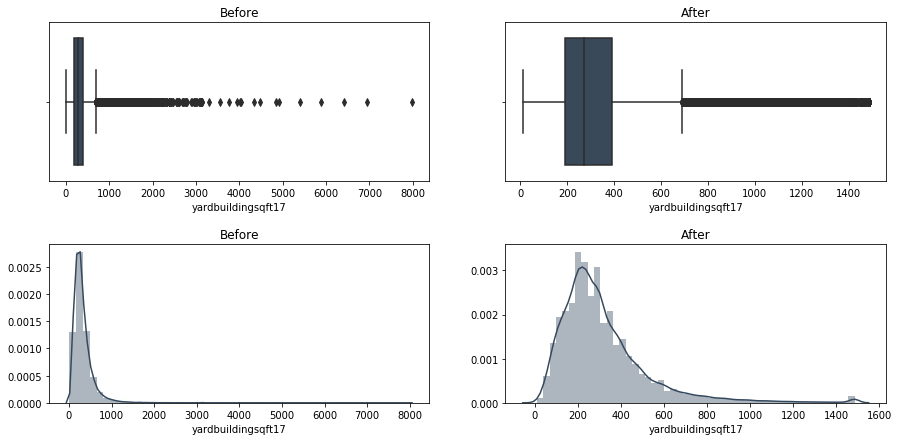

In [62]:
fix_outliers(dataset, 'yardbuildingsqft17')
dataset['yardbuildingsqft17'] = dataset['yardbuildingsqft17'].fillna(0).astype(np.int32)

### Variable: yardbuildingsqft26 - storage shed/building in yard

Has datatype: interval and 99.91 percent of values missing 

We replaced all missing values with 0 which will represent no (square ft) storage shed or building in the yard. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


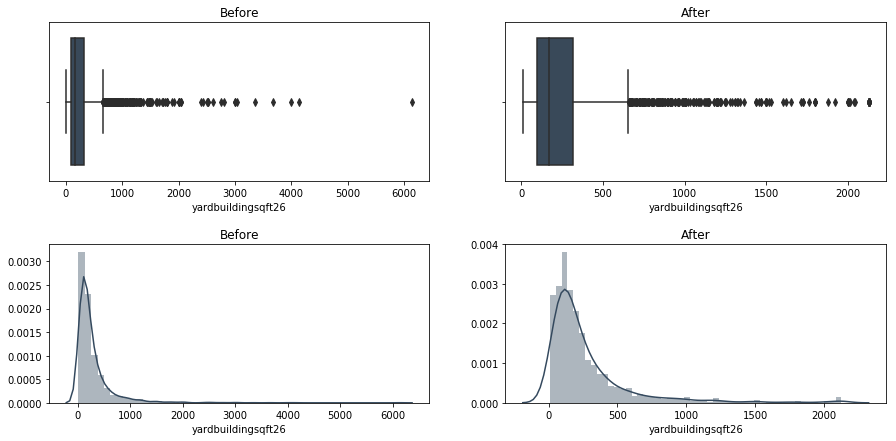

In [63]:
fix_outliers(dataset, 'yardbuildingsqft26')
dataset['yardbuildingsqft26'] = dataset['yardbuildingsqft26'].fillna(0).astype(np.float32)

### Variable: yearbuilt - The Year the residence was built

Has datatype: interval and 1.63 percent of values missing 

We replaced all missing values with the median year built of 1963 until we have a better method to impute. We changed the column datatype to integer.

In [64]:
print('Before', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])
medYear = dataset['yearbuilt'].median()
dataset['yearbuilt'] = dataset['yearbuilt'].fillna(medYear).astype(np.int32)
print('After', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])

Before [nan, 1948.0, 1947.0, 1943.0, 1946.0, 1978.0, 1958.0, 1949.0, '...']
After [1963, 1948, 1947, 1943, 1946, 1978, 1958, 1949, '...']


<a id="Description_4"></a>
## Final verification of data quality

We went through every variable and next cell will confirm that the dataset has no missing values.

<a href="#top">⏫ Back to Top</a>

In [65]:
assert np.all(~dataset.isnull())

<a id="Description_5"></a>
## Meaning and type of data for each attribute in the data file after data cleaning

<a href="#top">⏫ Back to Top</a>

In [66]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[0, 1, 13, 5, 11, 9, 12, 3]",Type of cooling system present in the home (if any)
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (37 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0, 4, 5, 2, 3, ... (21 More)]",Number of bedrooms in home
buildingqualitytypeid,ordinal,"[7, 4, 10, 1, 12, ... (12 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(0, 10926)",Calculated total finished living area of the home
censustractandblock,nominal,"[60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, ... (457 More)]",Census tract and block ID combined - also contains blockgroup assignment by extension
finishedsquarefeet12,ratio,"(0, 6615)",Finished living area
finishedsquarefeet50,ratio,"(0, 31303)",Size of the finished living area on the first (entry) floor of the home


<a id="Description_6"></a>
## Table of Binary Variables (0 or 1)
We standardized all Yes/No and True/False variables to 1 or 0, respectively. The table below shows that all binary flags in this dataset represent rare features such a pool, hot tub, tax delinquency flag, and three quarter bathroom.

<a href="#top">⏫ Back to Top</a>

In [67]:
bin_vars = ['hashottuborspa', 'poolcnt', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'taxdelinquencyflag', 'threequarterbathnbr']
pd.DataFrame(dataset[bin_vars].mean() * 100, columns=['Percent with value equal to 1'])

,Percent with value equal to 1
hashottuborspa,2.320750
poolcnt,17.403238
pooltypeid2,1.078594
pooltypeid7,16.324644
pooltypeid10,1.242156
taxdelinquencyflag,1.898661
threequarterbathnbr,10.584172


<a id="save_state"></a>
## Save dataset state

We save the cleaned dataset in order to faster load.

<a href="#top">⏫ Back to Top</a>

In [68]:
dataset.to_csv('../../datasets/clean_dataset.csv', index=False)
variables = variables.loc[dataset.columns]

<a id="restore_state"></a>
# Restore Cleaned Dataset [CHECKPOINT]

Next cell will restore the cleanded dataset. You could run this cell instead of runing all above cleaning cells.

<a href="#top">⏫ Back to Top</a>

In [2]:
dataset = pd.read_csv('../../datasets/clean_dataset.csv')
variables = variables.loc[dataset.columns]

<a id="Attribute"></a>
# Attribute Visualizion
<b>10 points</b>

<i>
<b>Description:</b><br/>
Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Viz1"></a>
## Count of Bedrooms
We think that the number of bedrooms in a home could be interesting because our data was collected in California where rent is very high. It is common to buy a rental property and have tenents who will occupy each room.  As a renter, the more rooms means one more person and splitting the rent one more way. In our dataset, most properties have 3 bedrooms and we see fewer instances as we go up or down one bedroom in the data. Here we still see records without any bedrooms which we justified as studios above.  The bar chart below uses number of bedrooms as a category and counts the frequency of each category.

<a href="#top">⏫ Back to Top</a>

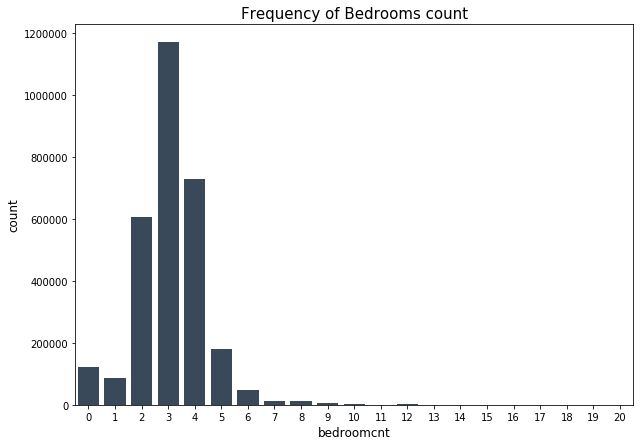

In [71]:
data = dataset
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.title("Frequency of Bedrooms count", fontsize=15)
sns.countplot(data['bedroomcnt'], color="#34495e");

<a id="Viz2"></a>
## Average Tax Per Square Feet

For our next attribute, we calculated the tax per square foot to see if we could find any trends.  We again chose to use a bar chart to plot the ratio and the sum counts.  What we found is that plotting this exposes extreme outliers for possible elimination. Most properties are under a few dollars per square foot but as the visualization reveals, there are suspicious records. However, because this is southern California and land space is limited for continuous growth, there could be a reason that some places have high tax per square feet due to better real estate areas.

<a href="#top">⏫ Back to Top</a>

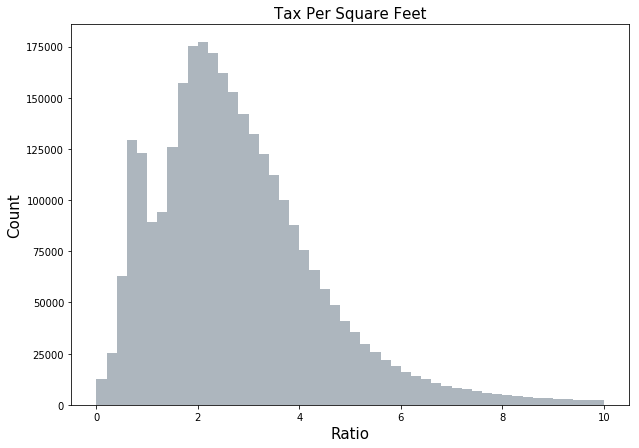

In [72]:
non_zero_mask = data['calculatedfinishedsquarefeet'] > 0
tax = data[non_zero_mask]['taxamount']
sqft = data[non_zero_mask]['calculatedfinishedsquarefeet']

tax_per_sqft = tax / sqft
tax_per_sqft = tax_per_sqft[tax_per_sqft<10]
sns.distplot(tax_per_sqft, color="#34495e", kde=False)

plt.title('Tax Per Square Feet', fontsize=15)
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Count', fontsize=15);

<a id="Viz3"></a>
## Continuous Variable Correlation Heatmap

Next we wanted to see a heatmap of correlations of our continuous variables.  The heapmap is displays correlation using the warmer colors to represent highly correlated variables, white as non-correlated, and colder colors is negatively correlated. We see that calculated finished square feet is correlated with finished square feet, due to collinearity. Tax amounts and year built are also highly correlated to finished square feet as well as with one another. 

Latitude and longitude are negatively correlated with each other possibly because the beachfront properties are more expensive.

<a href="#top">⏫ Back to Top</a>

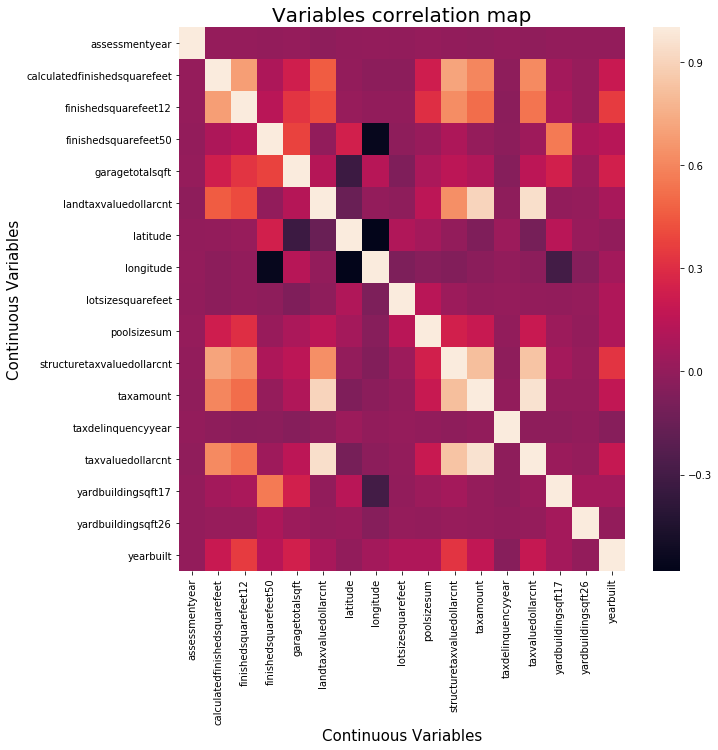

In [76]:
continuous_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continuous_vars = continuous_vars[continuous_vars.isin(data.columns)]
continuous_vars = continuous_vars.sort_values()

corrs = data[continuous_vars].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title("Variables correlation map", fontsize=20)
plt.xlabel('Continuous Variables', fontsize=15)
plt.ylabel('Continuous Variables', fontsize=15);

<a id="Viz4"></a>
## Longitude and Latitude Data Points
From a simple graph, we can see the shoreline of California as well as possible areas of obstruction, such as mountains or bodies of water that prevent property growth in those areas. The majority of properties are in the center to upper left of the graph.

<a href="#top">⏫ Back to Top</a>

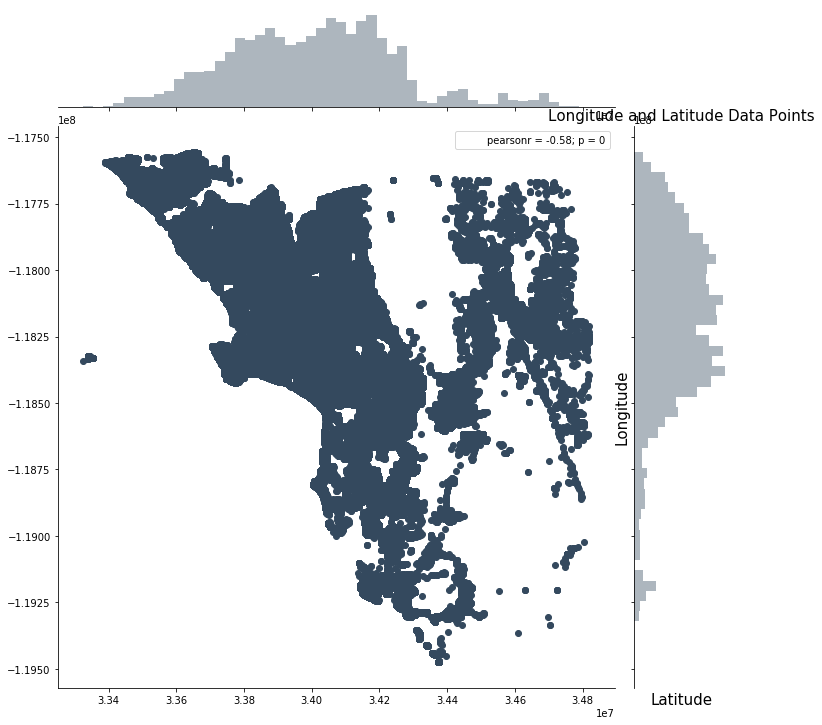

In [77]:
plt.figure(figsize=(12,12));
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10, color="#34495e");
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.title('Longitude and Latitude Data Points', fontsize=15);

<a id="Viz5"></a>
## Number of Stories vs Year Built
As architectural feats improved, we started to see more properties with 2 or more stories by 1950. The number of one story properties also increased during that time. The baby boomers, the end of WWII and readily available steel, and mortgage incentives may be the cause of the increase of more properties being built as well as more stories per property. Note: because we filled in missing values as the median value, the 1965 spike in the data is artificial until we use other methods to impute year built.

<a href="#top">⏫ Back to Top</a>

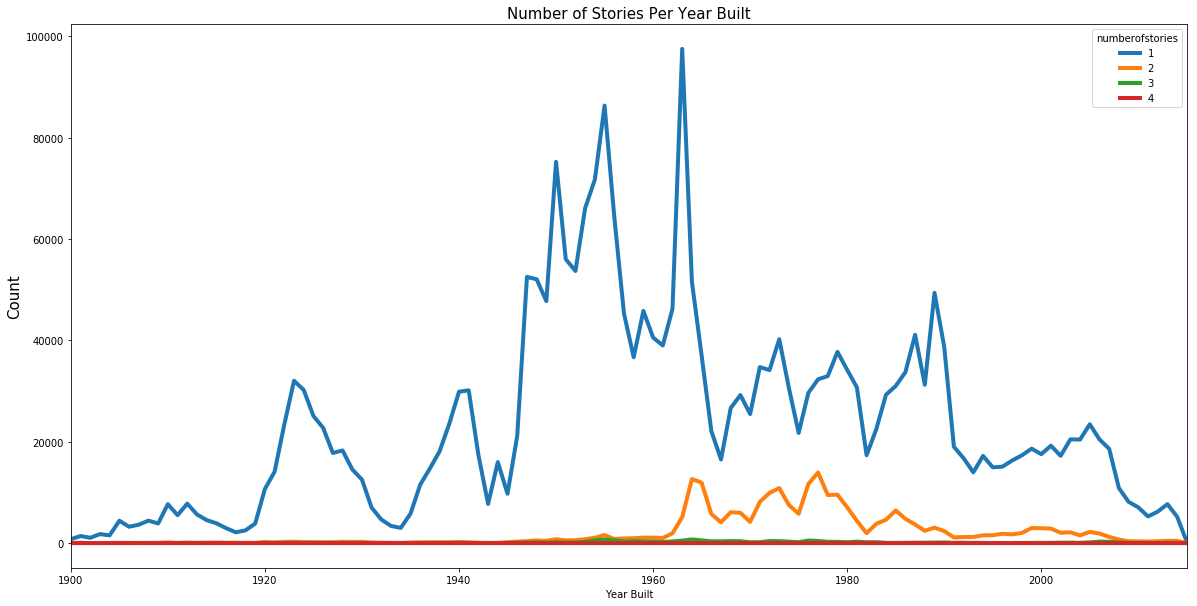

In [78]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
yearMerged = data.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged = yearMerged.loc[1900:]
yearMerged.index.name = 'Year Built'

plt.title('Number of Stories Per Year Built', fontsize=15)
plt.ylabel('Count', fontsize=15);

yearMerged.plot(ax=ax1, linewidth=4);

# FYI Modeling and Evaluation, delete later

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

* [10 Points] Train and adjust parameters
* [10 Points] Evaluate and Compare
* [10 Points] Visualize Results
* [20 Points] Summarize the Ramifications

Option A: Cluster Analysis
* Train: Perform cluster analysis using several clustering methods (adjust parameters).
* Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters foreach method?
* Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
* Summarize: Describe your results. What findings are the most interesting and why?

Option B: Association Rule Mining
* Train: Create frequent itemsets and association rules (adjust parameters).
* Eval: Use several measure for evaluating how interesting different rules are.
* Visualize: Use tables/visualization to discuss the found results.
* Summarize: Describe your results. What findings are the most compelling and why?

Option C: Collaborative Filtering
* Train: Create user-item matrices or item-item matrices using collaborative filtering (adjust parameters).
* Eval: Determine performance of the recommendations using different performance measures (explain the ramifications of each measure).
* Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
* Summarize: Describe your results. What findings are the most compelling and why?

<a id="Train"></a>
# Train and Adjust Parameters
<b>10 points</b>

<i>
<b>Description:</b><br/>
Perform cluster analysis using several clustering methods (adjust parameters).
</i>

<a href="#top">⏫ Back to Top</a>

In [244]:

import math
from sklearn.metrics import silhouette_samples, silhouette_score

def calculate_max_distance(group, radius = 3959):
    """
    This computes max distance from points in the cluster
    
    radius = 3959 # miles (some algorithms use 3956)
    radius = 6371 # kilometers (some algorithms use 6367)
    radius = 3959 * 5280 # feet
    radius = 6371 * 1000 # meters
    
    Refference: https://gist.github.com/rochacbruno/2883505
    """
    lat1, lon1 = group[['latitude','longitude']].min()
    lat2, lon2 = group[['latitude','longitude']].max()
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c
    return distance

def cluster_analysis(data, labels, per_cluster=True):
    metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
    if per_cluster:
        for metric in metrics:
            data[metric] = silhouette_samples(data, labels, metric=metric)

        per_cluster_metrics = pd.DataFrame()
        for cluster_id, group in data.groupby(labels):
            row = group[metrics].mean()

            row['max distance in miles'] = calculate_max_distance(group)
            row['cluster_id'] = cluster_id
            per_cluster_metrics = per_cluster_metrics.append([row])
        per_cluster_metrics = per_cluster_metrics.set_index('cluster_id')
    else:
        per_cluster_metrics = None
    
    avg_metrics = {}
    for metric in 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan':
        avg_metrics[metric] = silhouette_score(data, labels, metric=metric)

    avg_metrics = pd.DataFrame([avg_metrics], index = ['Average for all Clusters'])
    
    return per_cluster_metrics, avg_metrics

data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)

<a id="train_kmeans"></a>

## KMeans
K-means is an iterative algorithm which assigns data points to the nearest centroid and updates the centroids each pass until convergence or predetermined number of iterations is met.  Mini-batch k-means is a variant of the k-means algorithm which uses a smaller subset of the data with the idea that it will converge faster thus reducing the computation time.  In comparison to other ways to reduce convergence, mini-batch produces results that are typically only slightly worse than k-means.  In practice we get as expected, mini-batch runs faster but produces slightly worse results.

<a href="#top">⏫ Back to Top</a>

,cityblock,cosine,euclidean,l1,l2,manhattan,max distance in miles
cluster_id,,,,,,,
0.0,0.445170,-0.043348,0.469114,0.445168,0.469114,0.445168,5242.932345
1.0,0.307614,-0.526995,0.324259,0.307613,0.324259,0.307613,1777.056854
2.0,0.495752,0.844092,0.519201,0.495754,0.519201,0.495753,7299.276209
3.0,0.328051,-0.524722,0.319136,0.328051,0.319136,0.328050,4680.169876
4.0,0.362278,-0.325716,0.374347,0.362277,0.374347,0.362276,4228.731223
5.0,0.319997,-0.275722,0.333600,0.319996,0.333600,0.319995,5820.893182
6.0,0.439646,-0.432699,0.457089,0.439646,0.457089,0.439645,6241.087705
7.0,0.408343,-0.221172,0.423249,0.408342,0.423249,0.408341,3548.435943
8.0,0.451536,0.661774,0.483242,0.451536,0.483242,0.451535,8289.110648


,cityblock,cosine,euclidean,l1,l2,manhattan
Average for all Clusters,0.380537,-0.231306,0.392521,0.380537,0.392521,0.380537


(None, None)

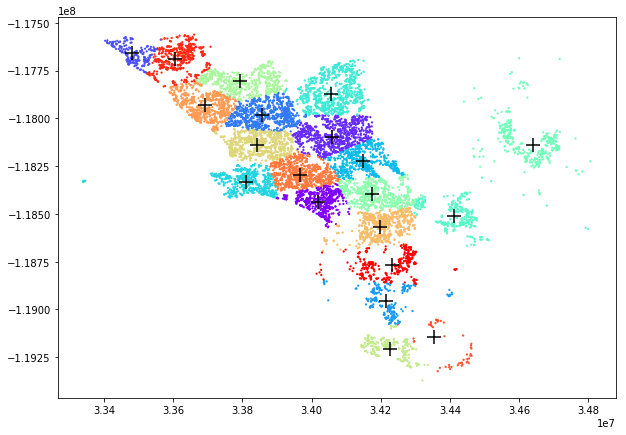

In [238]:
from sklearn.cluster import KMeans, MiniBatchKMeans

cls = MiniBatchKMeans(n_clusters=20, random_state=1)
labels = cls.fit_predict(data)

plt.scatter(
    data['latitude'], data['longitude'],
    c=labels, cmap=plt.cm.rainbow, s=5,
    linewidths=0
)

centroids = cls.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, linewidths=3, color='k')

per_cluster_metrics, avg_metrics = cluster_analysis(data, labels)
display(per_cluster_metrics), display(avg_metrics)

<a id="train_spectral"></a>

## Spectral Clustering

Spectral clustering uses the eigenvalues of the similarity matrix to reduce dimensions before clustering.  In practice this is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plan.  Since we are working with geo data, our dataset should be a good candidate for this type of clustering.

<a href="#top">⏫ Back to Top</a>

/usr/local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,cityblock,cosine,euclidean,l1,l2,manhattan,max distance in miles
cluster_id,,,,,,,
0.0,0.437871,0.003047,0.457797,0.437871,0.457797,0.437871,10945.114897
1.0,0.163048,-0.802853,0.158295,0.163051,0.158295,0.163052,5466.083870
2.0,0.449156,-0.597750,0.460149,0.449157,0.460149,0.449157,11350.682853
3.0,0.403584,-0.289278,0.431033,0.403585,0.431033,0.403585,8950.963504
4.0,0.454858,-0.437187,0.497655,0.454857,0.497655,0.454857,11441.775480
5.0,0.682253,0.909910,0.687221,0.682253,0.687221,0.682253,9171.823585
6.0,0.288864,-0.737632,0.319169,0.288866,0.319169,0.288867,3687.783779
7.0,0.351076,-0.101945,0.365884,0.351076,0.365884,0.351076,8761.708344
8.0,0.660862,0.481458,0.668321,0.660862,0.668321,0.660862,6112.927901


,cityblock,cosine,euclidean,l1,l2,manhattan
Average for all Clusters,0.315965,-0.388653,0.321186,0.315965,0.321186,0.315965


(None, None)

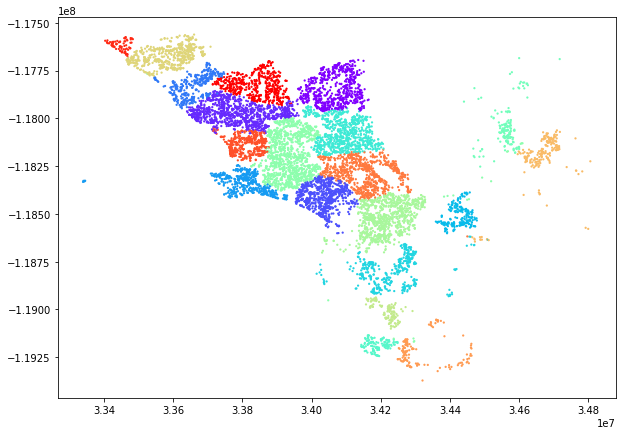

In [240]:
from sklearn.cluster import SpectralClustering

cls = SpectralClustering(n_clusters=20, affinity = 'nearest_neighbors')
labels = cls.fit_predict(data)

plt.scatter(
    data['latitude'], data['longitude'],
    c=labels, cmap=plt.cm.rainbow, s=5,
    linewidths=0
)

per_cluster_metrics, avg_metrics = cluster_analysis(data, labels)
display(per_cluster_metrics), display(avg_metrics)

<a id="train_agglomerative"></a>

## Agglomerative Clustering

Agglomerative clustering is a hierarchical algorithm which uses a bottom up approach where each observation starts in its own cluster while pairs of clusters are merged as they move up the hierarchy.  This algorithm recursively merges the pair of clusters that minimally increases a given linkage distance.  Because the linkage criteria determines the metric used for the merge strategy, we will be playing around with all 3 criteria: ward, maximum, and average for analysis.


<a href="#top">⏫ Back to Top</a>

In [241]:
from sklearn.cluster import AgglomerativeClustering

data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)

for linkage in 'average', 'complete', 'ward':
    cls = AgglomerativeClustering(n_clusters=20, linkage=linkage)
    labels = cls.fit_predict(data)

    print('-' * 80)
    print(linkage)
    per_cluster_metrics, avg_metrics = cluster_analysis(data, labels)
    display(per_cluster_metrics), display(avg_metrics)

--------------------------------------------------------------------------------
average


,cityblock,cosine,euclidean,l1,l2,manhattan,max distance in miles
cluster_id,,,,,,,
0.0,0.221591,-0.648350,0.223649,0.221592,0.223649,0.221592,4300.722915
1.0,0.553601,-0.507518,0.553154,0.553600,0.553154,0.553600,10050.619986
2.0,0.193333,-0.852893,0.190107,0.193335,0.190107,0.193335,4522.855754
3.0,0.396089,0.010164,0.428213,0.396088,0.428213,0.396088,228.164589
4.0,0.285467,-0.762246,0.288551,0.285467,0.288551,0.285467,5251.416467
5.0,0.512341,0.502416,0.537234,0.512341,0.537234,0.512340,8354.698696
6.0,0.700626,-0.083346,0.721923,0.700625,0.721923,0.700624,2067.558860
7.0,0.527159,0.272331,0.522301,0.527158,0.522301,0.527158,9715.734784
8.0,0.439086,-0.416713,0.431321,0.439087,0.431321,0.439087,1978.697401


,cityblock,cosine,euclidean,l1,l2,manhattan
Average for all Clusters,0.361246,-0.530355,0.365074,0.361246,0.365074,0.361246


--------------------------------------------------------------------------------
complete


,cityblock,cosine,euclidean,l1,l2,manhattan,max distance in miles
cluster_id,,,,,,,
0.0,0.264137,0.079029,0.257757,0.264136,0.257757,0.264136,3355.839823
1.0,0.410535,-0.414606,0.420752,0.410535,0.420752,0.410534,2237.325754
2.0,0.122985,0.010988,0.106907,0.122988,0.106907,0.122989,7143.427186
3.0,0.605757,-0.008698,0.607058,0.605756,0.607058,0.605756,9584.890473
4.0,0.483311,-0.515026,0.476508,0.483312,0.476508,0.483313,10285.191826
5.0,0.259739,-0.257599,0.266804,0.259739,0.266804,0.259739,2602.637408
6.0,0.236814,-0.421278,0.239847,0.236813,0.239847,0.236813,2536.695322
7.0,0.299945,-0.187440,0.290416,0.299943,0.290416,0.299943,8574.799529
8.0,0.263442,-0.454989,0.258668,0.263443,0.258668,0.263443,7642.821024


,cityblock,cosine,euclidean,l1,l2,manhattan
Average for all Clusters,0.329865,-0.259497,0.33226,0.329865,0.33226,0.329865


--------------------------------------------------------------------------------
ward


,cityblock,cosine,euclidean,l1,l2,manhattan,max distance in miles
cluster_id,,,,,,,
0.0,0.228060,-0.329569,0.239989,0.228060,0.239989,0.228060,5852.103471
1.0,0.384578,-0.527845,0.390916,0.384579,0.390916,0.384579,9836.466795
2.0,0.672299,0.876049,0.675164,0.672300,0.675164,0.672301,1952.265944
3.0,0.317165,-0.469761,0.328446,0.317165,0.328446,0.317164,7886.684046
4.0,0.595574,-0.763743,0.621076,0.595575,0.621076,0.595576,5997.315323
5.0,0.302197,-0.804284,0.317731,0.302200,0.317731,0.302200,4306.106044
6.0,0.218693,-0.233600,0.250336,0.218694,0.250336,0.218694,5383.273639
7.0,0.485904,-0.000353,0.487136,0.485903,0.487136,0.485903,9664.999218
8.0,0.259810,-0.320619,0.269973,0.259810,0.269973,0.259810,552.780681


,cityblock,cosine,euclidean,l1,l2,manhattan
Average for all Clusters,0.366391,-0.253968,0.378405,0.366391,0.378405,0.366391


<a id="Evaluate"></a>
# Evaluate and Compare
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters foreach method?
</i>

<a href="#top">⏫ Back to Top</a>

## Evaluation metrics

In lab 2, we evaluated regression algorithms using metrics involving counts of the hits and misses.  For clustering, we will use distance metrics as our evaluation metric: cosine, Euclidean (or l2), Manhattan (or city block or l1), and max distance in miles.   We want a metric which maximizes the distance between samples in different classes, and minimizes that within each class.  

Cosine similarity measures the cosine of the angle between two given vectors (clusters).  Cosine is good for length normalization and where we have sparse vectors.  The Manhattan/ City Block/ L1 distance is the sum of the absolute value of error and the Euclidean/ L2 distance is the square root of the sum of squared error.

/usr/local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1406: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


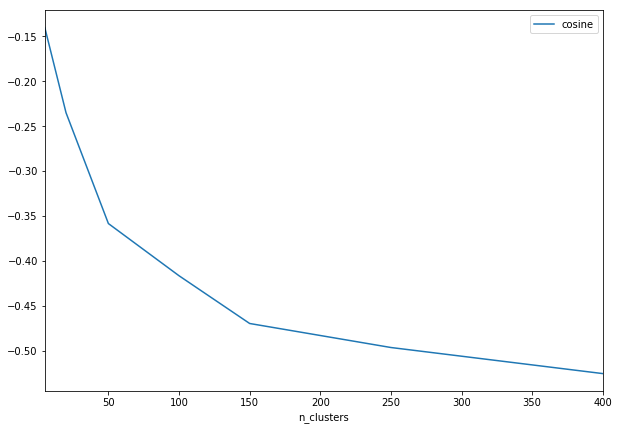

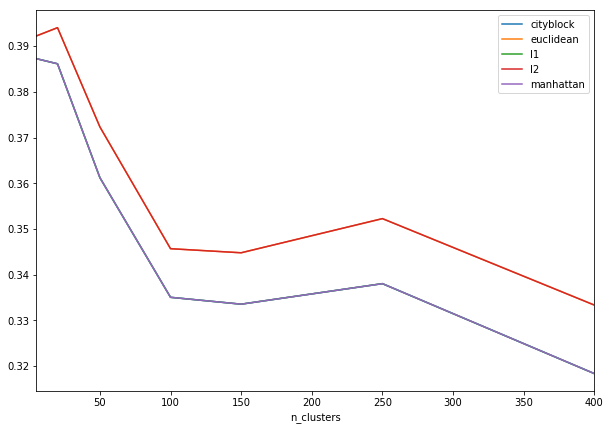

In [252]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from pprint import pprint

result = pd.DataFrame()

for n_clusters in [5, 20, 50, 100, 150, 250, 400]:
    cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=1)
    labels = cls.fit_predict(data)
    
    _, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['n_clusters'] = n_clusters

    result = result.append(avg_metrics)
result = result.set_index('n_clusters')

result[['cosine']].plot()

all_others = result.columns
all_others = all_others[~all_others.isin(['cosine'])]

result[all_others].plot()

<a id="Visualize"></a>
# Visualize Results
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use tables/visualization to discuss the found results. Explain each visualization in detail.
</i>

<a href="#top">⏫ Back to Top</a>

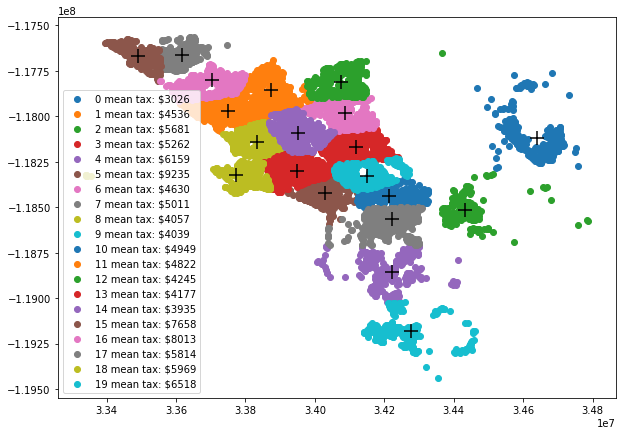

In [271]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, MiniBatchKMeans

data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)

cls = MiniBatchKMeans(n_clusters=20, random_state=1)
cls.fit(data)
centroids = cls.cluster_centers_
labels = cls.labels_

for cluster_id in np.unique(labels):
    d = data[labels == cluster_id]
    label = str(cluster_id) + ' mean tax: $' + str(int(d['taxamount'].mean()))
    plt.scatter(d['latitude'], d['longitude'], label=label)
plt.legend()
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, linewidths=3, color='k')

<a id="Ramifications"></a>
# Summarize the Ramifications
<b>20 points</b>

<i>
<b>Description:</b><br/>
Describe your results. What findings are the most interesting and why?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Deployment"></a>
# Deployment
<b>10 points</b>

<i>
<b>Description:</b><br/>
Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?
* How often would the model need to be updated, etc.?
</i>

<a href="#top">⏫ Back to Top</a>

Since our dataset included geo-location data in the form of lat and lon coordinates, we were able to perform mapping visualizations on select variables. In our clustering analysis, we show clusters based on property tax amounts. This model can be utilized by insurance companies to design marketing campaigns customized to each cluster. Property taxes are proportional to property values and insurance offers can be designed according to the target segment. In addition, the clustering results can drive the type of media engagement and advertising spend. This type of analysis can be deployed as part of a market study or insurance publication/journal. It can be updated as often as such studies or journals are released, e.g. monthly or quarterly.

Another potential application of marrying geo and property tax data is in the area of public policy. Property taxes are a vital revenue source for the local communities they are collected from. Public policy around the assessment, collection, and distribution of revenues from property taxes have significant social implications. In the case of California’s Prop 13 (our dataset consists of properties in Southern California) which was passed in 1978, it provided protections for low income homeowners by restricting increases to no more than 2% a year. However, it also provided the same restrictions to high value properties such as those in wealthier communities, corporate and commercial properties. This became a tax loophole affecting funding for schools and local services such as parks, police, fire, and transportation. A clustering analysis on property tax is something that can be deployed to the California based “Make It Fair” coalition to help build its case for a more robust tax policy that is equitable and ensures the delivery of vital services to local communities. In addition, spatial analytics such as the one proposed by Payton (see references) can be applied to examinations of equity in property tax assessment reforms.

References:

https://ncg.org/events/make-it-fair-policy-change-equitable-california

https://ageconsearch.umn.edu/bitstream/132329/2/06-2-7.pdf

<a id="Exceptional"></a>
# Exceptional Work
<b>10 points</b>

<i>
<b>Description:</b><br/>
You have free reign to provide additional analyses or combine analyses.
</i>

<a href="#top">⏫ Back to Top</a>

In [3]:
data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)
data.loc[:,'latitude'] /= 1000000
data.loc[:,'longitude'] /= 1000000
max_amount = float(data['taxamount'].max())
midlat=((data.loc[:,'latitude'].max()+data.loc[:,'latitude'].min())/2)
midlong=((data.loc[:,'longitude'].max()+data.loc[:,'longitude'].min())/2)
data=data.values.tolist()

In [6]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

hmap = folium.Map(location=[midlat, midlong], zoom_start=9, )

hm_wide = HeatMap(data, 
                  min_opacity=0.2,
                  max_val=max_amount,
                  radius=10, blur=10, 
                  max_zoom=1, 
                  )

hmap.add_child(hm_wide)

# References

- Kernels from Kaggle competition: https://www.kaggle.com/c/zillow-prize-1/kernels
- Pandas cookbook: https://pandas.pydata.org/pandas-docs/stable/cookbook.html
- Stackoverflow pandas questions: https://stackoverflow.com/questions/tagged/pandas
- Sklearn Clustering: http://scikit-learn.org/stable/modules/clustering.html
- Data Mining Notebooks: https://github.com/eclarson/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb

<a href="#top">⏫ Back to Top</a>